In [3]:
import pandas as pd
import numpy as np


df = pd.read_csv(r"D:\Download\archive (3)\KaggleV2-May-2016.csv")


df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [ ]:
#Visualize missing data patterns (Bar Chart)

IndexError: index 0 is out of bounds for axis 0 with size 0

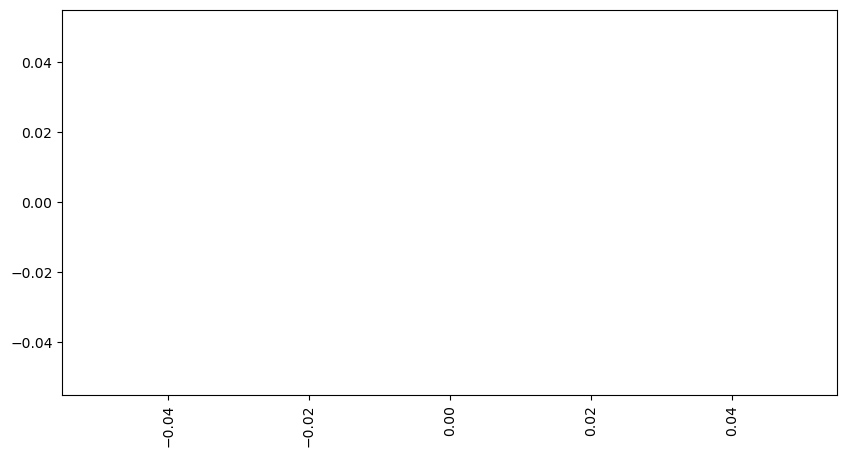

In [4]:
import matplotlib.pyplot as plt

missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]

plt.figure(figsize=(10,5))
missing_values.plot(kind='bar')
plt.title("Missing Values per Column")
plt.ylabel("Count")
plt.xlabel("Columns")
plt.xticks(rotation=45)
plt.show()


In [ ]:
#Mean / Median Imputation for Numerical Columns

In [5]:

num_cols = df.select_dtypes(include=['int64', 'float64']).columns


for col in num_cols:
    if df[col].isnull().sum() > 0:
        if df[col].skew() < 1:
            df[col].fillna(df[col].mean(), inplace=True)
        else:
            df[col].fillna(df[col].median(), inplace=True)

df[num_cols].isnull().sum()


PatientId        0
AppointmentID    0
Age              0
Scholarship      0
Hipertension     0
Diabetes         0
Alcoholism       0
Handcap          0
SMS_received     0
dtype: int64

In [ ]:
# Mode Imputation for Categorical Columns

In [6]:

cat_cols = df.select_dtypes(include=['object']).columns


for col in cat_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

df[cat_cols].isnull().sum()


Gender            0
ScheduledDay      0
AppointmentDay    0
Neighbourhood     0
No-show           0
dtype: int64

In [ ]:
# Remove Columns with Extremely High Missing Values

In [8]:

df_original = pd.read_csv(r"D:\Download\archive (3)\KaggleV2-May-2016.csv")

missing_percentage = (df_original.isnull().sum() / len(df_original)) * 100


high_missing_cols = missing_percentage[missing_percentage > 40].index


df.drop(columns=high_missing_cols, inplace=True)

high_missing_cols


Index([], dtype='object')

In [ ]:
# Validate Dataset After Cleaning

In [9]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [10]:
# Confirm no missing values remain
df.isnull().sum()


PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [ ]:
# Compare Before vs After Dataset Size & Quality

In [11]:
print("Before Cleaning")
print("Shape:", df_original.shape)
print("Total Missing Values:", df_original.isnull().sum().sum())

print("\nAfter Cleaning")
print("Shape:", df.shape)
print("Total Missing Values:", df.isnull().sum().sum())


Before Cleaning
Shape: (110527, 14)
Total Missing Values: 0

After Cleaning
Shape: (110527, 14)
Total Missing Values: 0
